## PROJECT_02 : F.B.I GUN DATA
<ul>
    <li><a herf='#intro'>Introduction</a></li>
    <li><a herf='#wrang'>Wrangle Data</a></li>
    <li><a herf='#eda'>Explore data analysis</a></li>
    <li><a herf="#conclusions">Conclusions</a></li>
    <li><a herf='#commun'>Communicating Results</a></li>
</ul>

<a id='intro'></a>
## INTRODUCTION
- **OVERVIEW**
 > 1. The data comes from the FBI's National Instant Criminal Background Check System.
 
 > 2. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives.
 
 > 3. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.

In [1]:
# import requied models 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrang'></a>
## WRANGLE DATA

#### Gaddring Data 

In [2]:
df_guns = pd.read_excel('gun_data.xlsx')

In [3]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

<p></p>

### Checking data frame columns which has no valuse to the data frame  

In [4]:
df_guns.iloc[:, 15:25].head(20)

,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun
0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0
1,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0
2,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,202.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,264.0,28.0,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0


<p></p>

### Cleaning coulmns labels in the data frame 

In [5]:
column_name = df_guns.columns[15:26]

df_guns = df_guns.drop(columns=column_name)
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                12485 non-null  object 
 1   state                12485 non-null  object 
 2   permit               12461 non-null  float64
 3   permit_recheck       1100 non-null   float64
 4   handgun              12465 non-null  float64
 5   long_gun             12466 non-null  float64
 6   other                5500 non-null   float64
 7   multiple             12485 non-null  int64  
 8   admin                12462 non-null  float64
 9   prepawn_handgun      10542 non-null  float64
 10  prepawn_long_gun     10540 non-null  float64
 11  prepawn_other        5115 non-null   float64
 12  redemption_handgun   10545 non-null  float64
 13  redemption_long_gun  10544 non-null  float64
 14  redemption_other     5115 non-null   float64
 15  totals               12485 non-null 

<p></p>

### Checking for duplicate rows in data frame

In [6]:
print( 'df_guns duplicate rows : {}'.format( sum( df_guns.duplicated() ) ) )

df_guns duplicate rows : 0


<p></p>

### Viewing shape of the data frame with null values  

In [7]:
df_guns[df_guns.isnull()==False].shape

(12485, 16)

<p></p>

### Converting  columns object type to the right data type 

In [8]:
# converting month columns into pandase date time
df_guns['month'] = pd.to_datetime(df_guns['month'])

In [9]:
# converting all columns into float
df_guns['multiple'] = pd.to_numeric(df_guns['multiple']).astype(float)
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                12485 non-null  datetime64[ns]
 1   state                12485 non-null  object        
 2   permit               12461 non-null  float64       
 3   permit_recheck       1100 non-null   float64       
 4   handgun              12465 non-null  float64       
 5   long_gun             12466 non-null  float64       
 6   other                5500 non-null   float64       
 7   multiple             12485 non-null  float64       
 8   admin                12462 non-null  float64       
 9   prepawn_handgun      10542 non-null  float64       
 10  prepawn_long_gun     10540 non-null  float64       
 11  prepawn_other        5115 non-null   float64       
 12  redemption_handgun   10545 non-null  float64       
 13  redemption_long_gun  10544 non-

<p></p>

### Replacing all null valuse with there mean 

In [10]:
mean = df_guns.mean()
df_guns = df_guns.fillna(mean)
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                12485 non-null  datetime64[ns]
 1   state                12485 non-null  object        
 2   permit               12485 non-null  float64       
 3   permit_recheck       12485 non-null  float64       
 4   handgun              12485 non-null  float64       
 5   long_gun             12485 non-null  float64       
 6   other                12485 non-null  float64       
 7   multiple             12485 non-null  float64       
 8   admin                12485 non-null  float64       
 9   prepawn_handgun      12485 non-null  float64       
 10  prepawn_long_gun     12485 non-null  float64       
 11  prepawn_other        12485 non-null  float64       
 12  redemption_handgun   12485 non-null  float64       
 13  redemption_long_gun  12485 non-

<a id='eda'></a>

## Explor DATA Analysis

<p></p>

### Checking which column in the data frame will dicribe more about the data frame  

In [11]:
discribe = df_guns.describe()
discribe

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,21595.725911
std,23729.495816,2736.848174,8611.677589,9302.758891,895.634628,783.185073,604.257419,10.023040,15.130888,0.676584,720.023310,875.000351,2.927929,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1165.956364,868.000000,2079.000000,163.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4638.000000
50%,522.000000,1165.956364,3067.000000,5130.000000,360.471636,125.000000,0.000000,1.000000,3.000000,0.165591,147.000000,340.000000,1.815249,12399.000000
75%,4338.000000,1165.956364,7277.000000,10374.000000,360.471636,301.000000,0.000000,4.828021,7.834156,0.165591,421.000000,670.000000,1.815249,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,541978.000000


<a id=''></a>
###  Pie Chart Of The Most Ordered Gun's

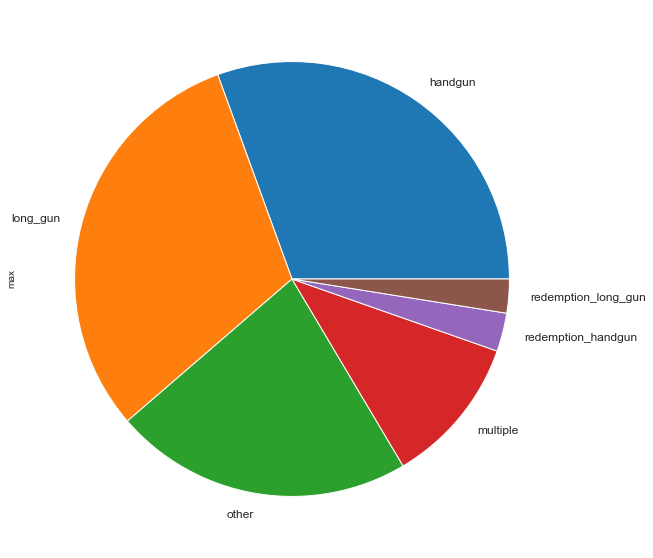

In [12]:
discribe.iloc[7, np.r_[2:6, 10:12]].plot(kind='pie', figsize=(10,10), fontsize=12);

### Observation

1. prepawn_long_gun
2. prepawn_handgun
3. prepawn_other
4. redemption_other

**Has maximum order lower than 150 which can not be viwed on the pie chart**   


<p></p>

### Targetting The Mean & Max of all state for easy exploration 

In [13]:
df_mean = df_guns.groupby('state').mean()
df_max = df_guns.groupby('state').max()

<p></p>

## City's With High Gun Registaration 

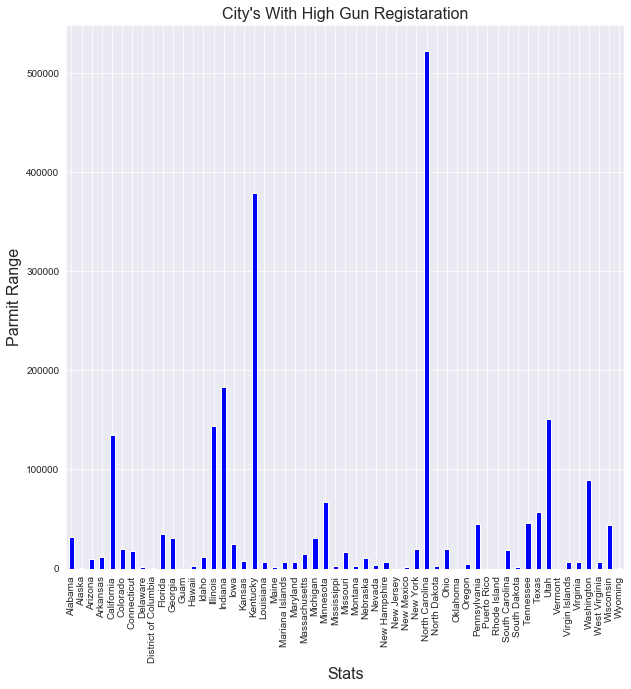

In [14]:
# plotting data for city with high gun parmit over the past years
df_max['permit'].plot(kind='bar',figsize=(10, 10), color='b')
plt.title("City's With High Gun Registaration", fontsize=16)
plt.xlabel('Stats', fontsize=16)
plt.ylabel('Parmit Range', fontsize=16);

<p></p>

## Which City’s have Highest Gun Permit Recheck?

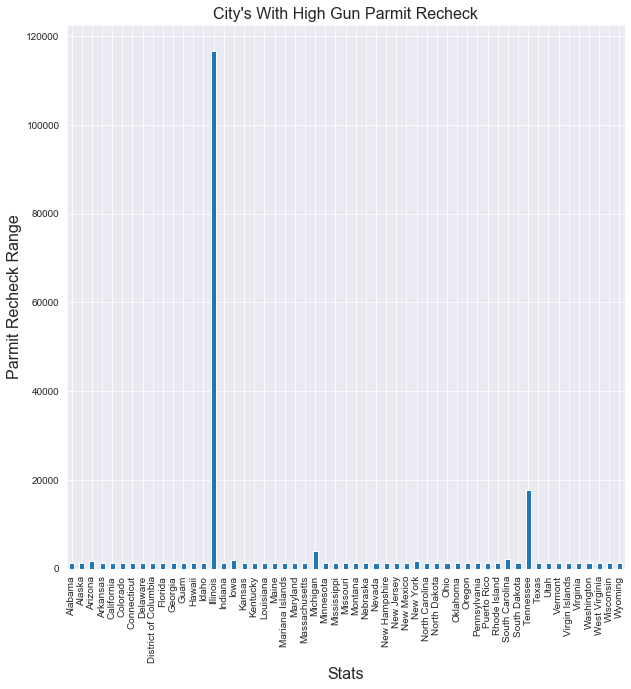

In [15]:
# plotting for city's which are more safe by gun permit recheck over the year's
df_max['permit_recheck'].plot(kind='bar',figsize=(10, 10))
plt.title("City's With High Gun Parmit Recheck", fontsize=16)
plt.xlabel('Stats', fontsize=16)
plt.ylabel('Parmit Recheck Range', fontsize=16);

## **What census data is most associated with high gun per capita?**

In [16]:
df_guns.iloc[:, np.r_[0, 1, 4:8, 10:15]].groupby('state', as_index=False).max()

,state,month,handgun,long_gun,other,multiple,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other
0,Alabama,2017-09-01,47605.000000,42433.000000,1698.000000,1752.0,132.000000,3.000000,3380.000000,3308.000000,11.000000
1,Alaska,2017-09-01,5265.000000,6304.000000,394.000000,373.0,24.000000,1.000000,407.970413,599.332417,5.000000
2,Arizona,2017-09-01,25562.000000,19634.000000,1345.000000,1102.0,30.000000,2.000000,2179.000000,1204.000000,11.000000
3,Arkansas,2017-09-01,13780.000000,19908.000000,365.000000,738.0,125.000000,3.000000,1643.000000,3908.000000,6.000000
4,California,2017-09-01,74399.000000,93224.000000,77929.000000,38907.0,7.834156,0.165591,785.000000,831.000000,79.000000
5,Colorado,2017-09-01,34653.000000,27112.000000,1903.000000,8758.0,7.834156,0.165591,407.970413,599.332417,1.815249
6,Connecticut,2017-09-01,17828.000000,12310.000000,1276.000000,202.0,7.834156,49.000000,407.970413,599.332417,1.815249
7,Delaware,2017-09-01,3615.000000,3274.000000,360.471636,137.0,7.834156,0.165591,407.970413,599.332417,7.000000
8,District of Columbia,2017-09-01,83.000000,193.000000,360.471636,2.0,7.834156,0.165591,407.970413,599.332417,1.815249
9,Florida,2017-09-01,86940.000000,59904.000000,5096.000000,3436.0,54.000000,2.000000,4401.000000,1823.000000,12.000000


### Observation 

  1. The Cencuse Data Mostly Associated With High Gun Per Capital is 2017-09-01

<p></p>

## Overall Trend's Of Gun's purchase 

In [17]:
#targetting overall trends of guns puchsed "mean" comperisime 
overall = df_guns.loc[:, 'handgun':'redemption_other'].mean()
overall

handgun                5940.881107
long_gun               7810.847585
other                   360.471636
multiple                268.603364
admin                    58.898090
prepawn_handgun           4.828021
prepawn_long_gun          7.834156
prepawn_other             0.165591
redemption_handgun      407.970413
redemption_long_gun     599.332417
redemption_other          1.815249
dtype: float64

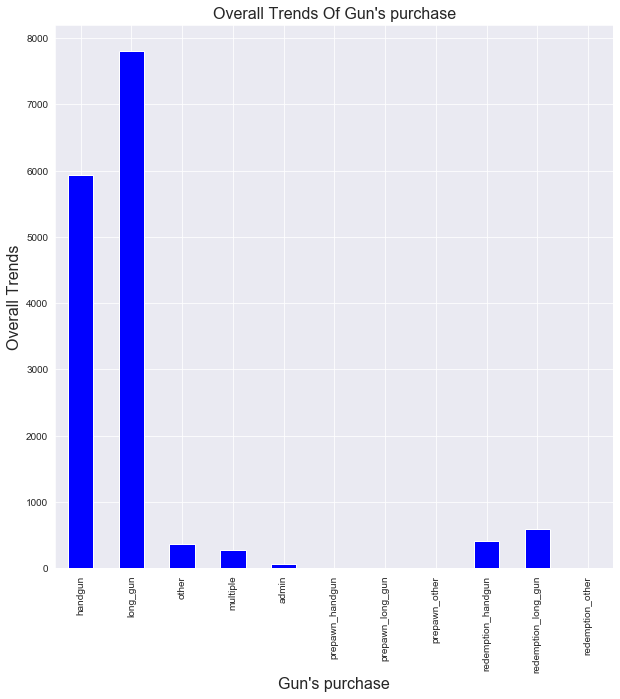

In [18]:
# plotting bar chart overall trends of guns purchase by
overall.plot(kind='bar', figsize=(10,10), color='b')
plt.xlabel('Gun\'s purchase', fontsize=16)
plt.ylabel('Overall Trends', fontsize=16)
plt.title('Overall Trends Of Gun\'s purchase', fontsize=16);

<p></p>

### plotting pie chart of Overall Trends Of Gun\'s purchase

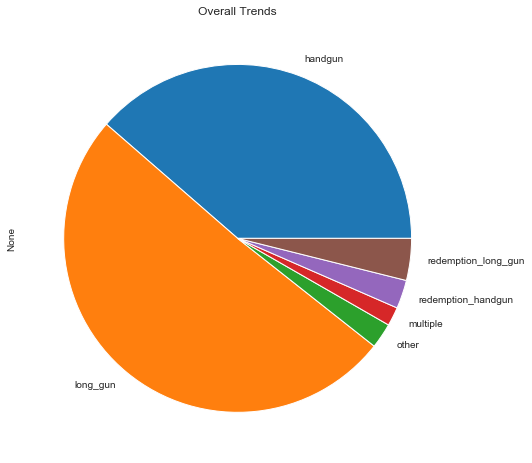

In [19]:
# iloc[7, np.r_[2:6, 10:12]]
overall[overall >= 100].plot(kind='pie', figsize=(8,8))
plt.title('Overall Trends');

<p></p>

### Observation 
  1. prepawn_handgun
  2. prepawn_long_gun
  3. prepawn_other
  4. redemption_other
  
  
  - All have a mean below 100 which can not be seen on the pie chart

<p></p>

## Overall Trens Of Gun's Purchase Per City's 

In [20]:
# targeting each city with there max guns purchase
# what type of gun did each city purchase the most

# targeting guns types and city's
guns = df_guns.loc[:, 'handgun':'redemption_other'].columns

citys = df_guns.groupby('state').max().iloc[:, np.r_[3:7, 8:14]]


In [21]:
# targeting each city's and its highest gun's purchase
gun_max_name = []
gun_max_number = []
city_names = []

def citys_max_guns_use(data_set): 
    
    for x in data_set.index:
        # target each citys
        citys_target = data_set.query('state == "{}"'.format(x))

        # target maximum for each city for easy acces 
        citys_max = citys_target.max()

        # target the gun used in each city maximum 
        citys_gun = citys_max[citys_max == citys_max.max()].index[0]

        # target the maximum number of guns puchase in each city 
        maximum = citys_max.max()

        # appending all data 
        gun_max_name.append(citys_gun)
        gun_max_number.append(maximum)
        city_names.append(x)

citys_max_guns_use(citys)

### Observations 

 - df_citys_max data frame contains maximum guns purchase for each city  

### Limitation Of New Data Frame

 - df_citys_max data frame is limited by cencuse data month 
 - df_citys_max data frame is limited by guns's permit 
 - df_citys_max data frame is limited by guns's permit recheck 

In [22]:
# creaing new data frame 
df_citys_max = pd.DataFrame({'stats': city_names, 'gun_purchase': gun_max_name, 'gun_max_valus': gun_max_number})
df_citys_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stats          55 non-null     object 
 1   gun_purchase   55 non-null     object 
 2   gun_max_valus  55 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


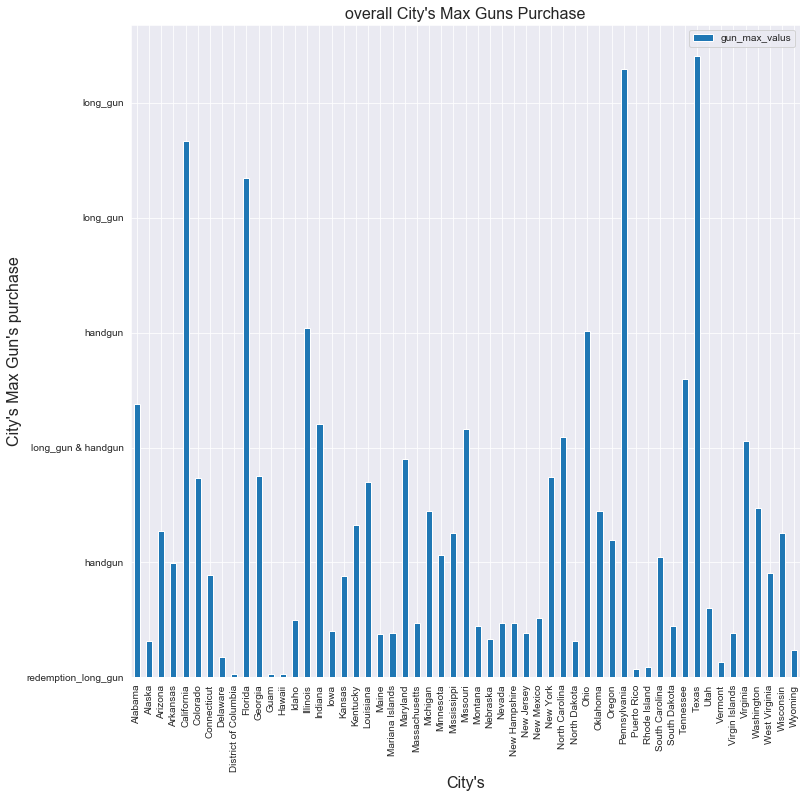

In [23]:
# plotting graph 
x_axis = df_citys_max.groupby('stats').mean()
x_axis.plot(kind='bar', figsize=(12,12));
plt.yticks([0,20000, 40000, 60000, 80000, 100000], ['redemption_long_gun', 'handgun', 'long_gun & handgun', 'handgun', 'long_gun', 'long_gun']);
plt.xlabel('City\'s', fontsize=16)
plt.ylabel('City\'s Max Gun\'s purchase', fontsize=16)
plt.title('overall City\'s Max Guns Purchase',fontsize=16);

<p></p>

### Moving Average Of Guns Per cencuse Histograme Graph

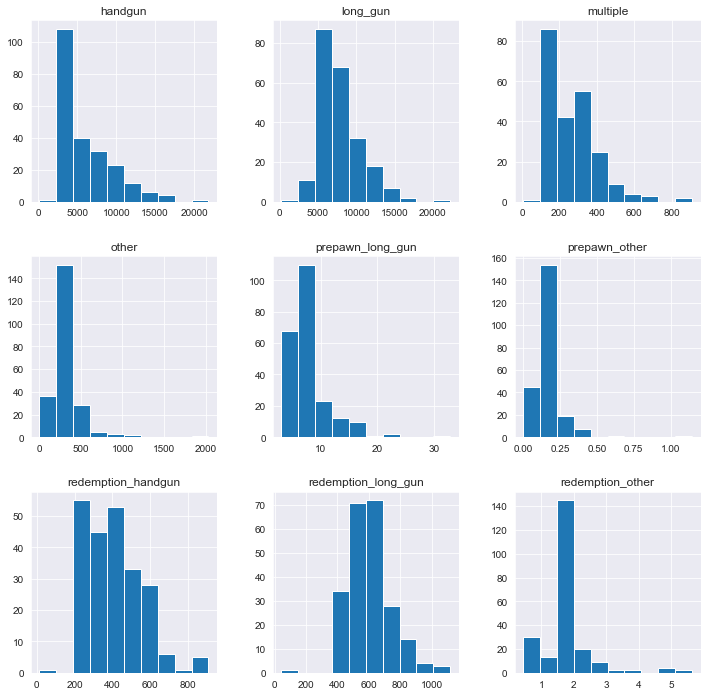

In [24]:
guns_moving_avg = df_guns.iloc[:, np.r_[0, 1, 4:8, 10:15]].groupby('month', as_index=False).mean()
guns_moving_avg.hist(figsize=(12, 12));

<p></p>

### Moving Average Of Guns Per cencuse Straight Line Graph 

#### Setting x axis and y axis

In [25]:
x = np.arange(len(guns_moving_avg))
handgun = guns_moving_avg['handgun']
long_gun = guns_moving_avg['long_gun']
multiple = guns_moving_avg['multiple']
other = guns_moving_avg['other']
redemption_handgun = guns_moving_avg['redemption_handgun']
redemption_long_gun = guns_moving_avg['redemption_long_gun']

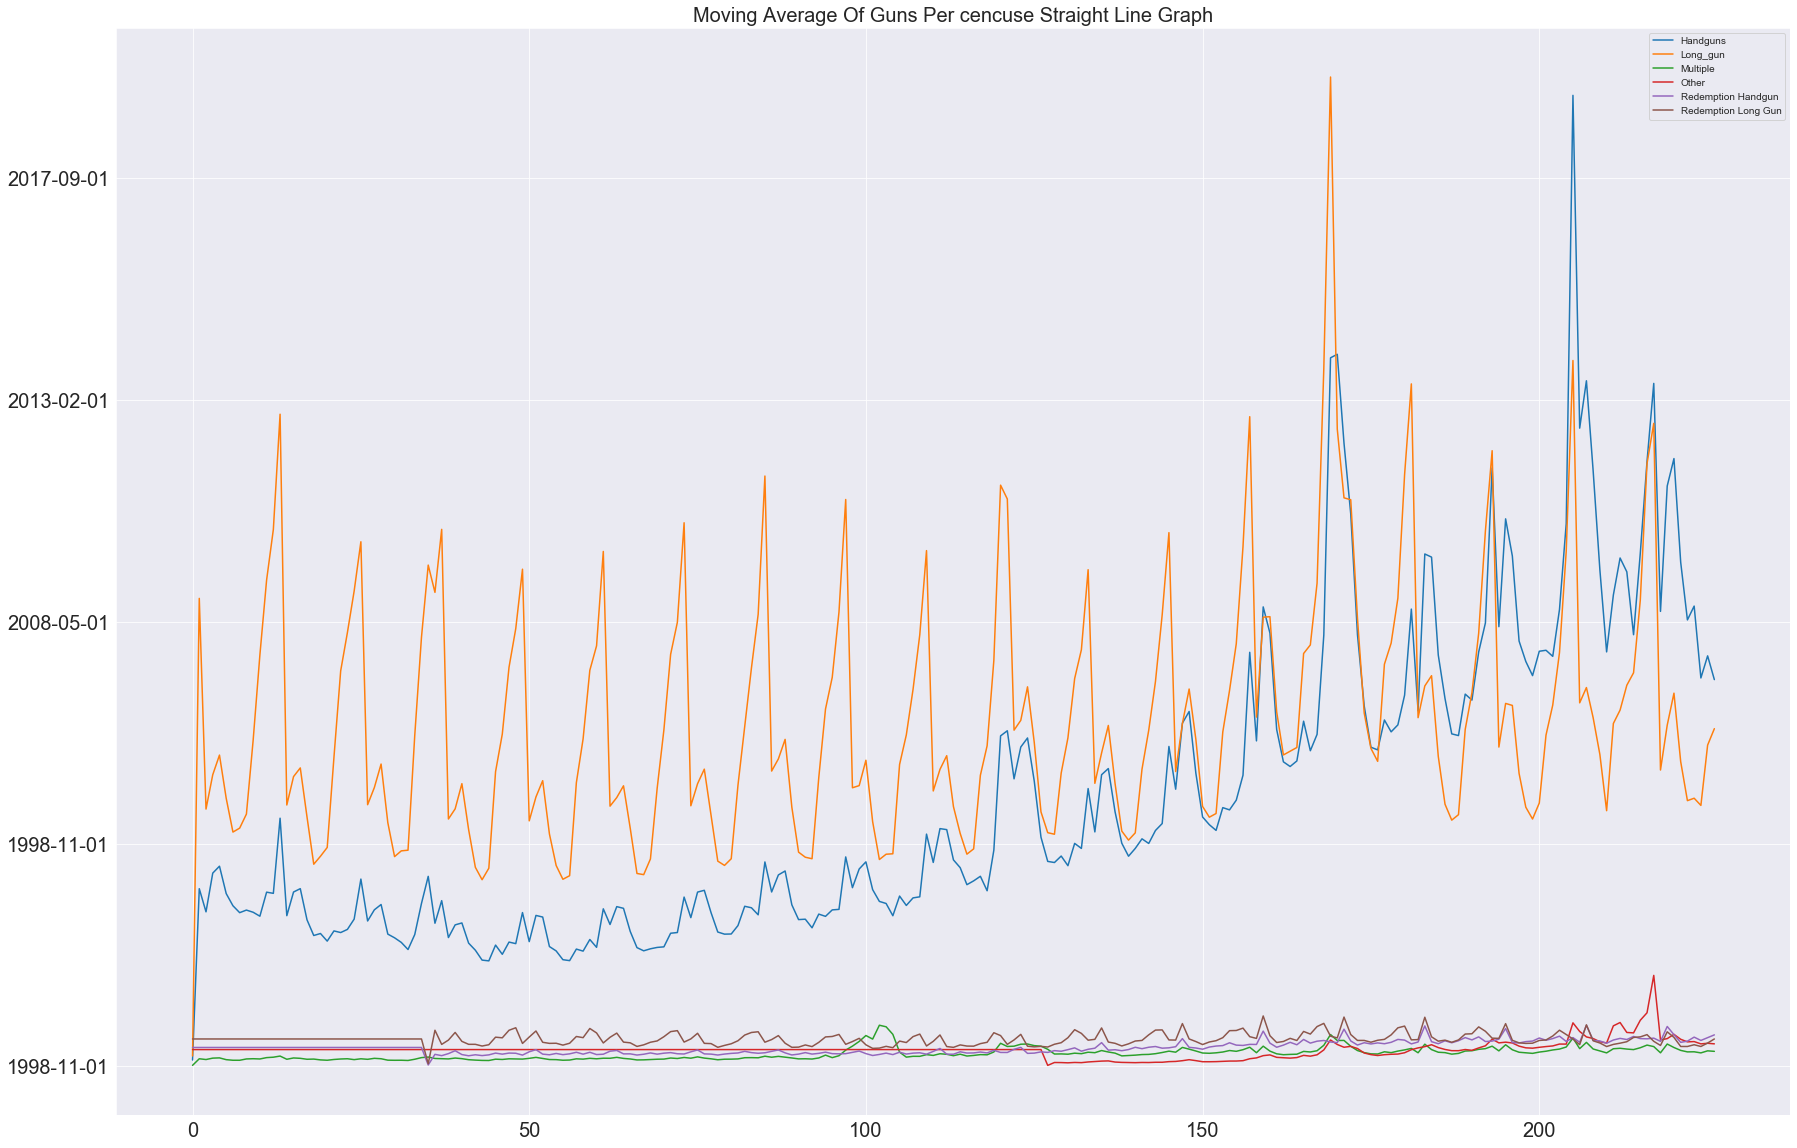

In [31]:
# plotting straight line graph
plt.figure(figsize=[30,20])
plt.plot(x, handgun, label='Handguns')
plt.plot(x, long_gun, label='Long_gun')
plt.plot(x, multiple, label='Multiple')
plt.plot(x, other, label='Other')
plt.plot(x, redemption_handgun, label='Redemption Handgun')
plt.plot(x, redemption_long_gun, label='Redemption Long Gun')
plt.title('Moving Average Of Guns Per cencuse Straight Line Graph', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([0, 5000, 10000, 15000, 20000], ['1998-11-01','1998-11-01', '2008-05-01', '2013-02-01', '2017-09-01'], 
          fontsize=20)
plt.legend();

In [27]:
guns_moving_avg.mean()

handgun                5940.881107
long_gun               7810.847585
other                   360.471636
multiple                268.603364
prepawn_long_gun          7.834156
prepawn_other             0.165591
redemption_handgun      407.970413
redemption_long_gun     599.332417
redemption_other          1.815249
dtype: float64

### observation

1. prepawn_long_gun
2. prepawn_handgun
3. prepawn_other
4. redemption_other

**All have a mean valuse lower than 50 which can not be viwed on the line graph**   


<a id='conclusions'></a>

# Conclusions

<h4><u>WRANGLING DATA</u><h4>
    
    1. Read file with pandas excel not csv 
    2. Converted all numerical column to float
    3. Converted month data type from object to date time 
    4. Replaced all null valuse with the mean
    5. Removed column labels that has no valuse to the data frame    
    
<h4><u>Limitations For Explor DATA Analysis </u><h4>
    
    1. prepawn_long_gun, prepawn_handgun, prepawn_other, redemption_other cloumns values are to low for plotting a pie graph aginst other column valuse     
    
    2. prepawn_long_gun, prepawn_handgun, prepawn_other, redemption_other cloumns values are to low for plotting a line graph aginst other column valuse   


<a id='commun'></a>

# comunication

<h4><u>BAR GRAPH</u><h4>
    
    - To show a clear comperisime between maximum Gun's used 
    - To show a clear comperisime between Stats maximum Gun registration
    - to show a clear comperisime between Stats maximum Gun registration recheck 
    - To show a clear comperisime between Guns used the most between each state 
    
<h4><u>PIE CHART</u><h4>
    
    - To show a clear percentage of  overall gun's purchas by mean valuse
    - To show a clear percentage of most ordered gun's by max valuse
    
<h4><u>HISTOGRAME GRAPH</u><h4>
    
    - Display moving average per cencuse for each guns purchased 
    
<h4><u>Straight line graph</u><h4>
    
    - Display moving average for each guns purchased per cencuse 